In [6]:
import sys
import os
import ssl
import certifi
import pandas as pd
import matplotlib.pyplot as plt

ssl._create_default_https_context = ssl._create_unverified_context

# Add src/ to Python path
# sys.path.append(os.path.abspath(os.path.join("..", "src")))
# Add the root of the project (not just src) to sys.path
sys.path.append(os.path.abspath(".."))

os.environ['SSL_CERT_FILE'] = certifi.where()

# Import function
from src.data.download_data import download_stock_data

In [7]:
# Download stock data

# df = ticker.history(start="2022-01-01", end="2023-01-01")
ticker = "JOBY"
df = download_stock_data(ticker, "2024-05-20", "2024-06-03")

if df is not None:
    print(f"[✓] Data shape: {df.shape}")
    display(df.head())
else:
    print("[!] Data download failed.")

# if df is None:
#     print("[!] Data download failed.")
# else:
#     print(f"[✓] Data shape: {df.shape}")
#     display(df.head())

📥 Downloading JOBY from Polygon.io...
[✓] Saved to data\raw\JOBY.csv
[✓] Data shape: (4992, 6)


,Date,Open,High,Low,Close,Volume
0,2024-05-20 08:08:00,5.08,5.08,5.08,5.08,569
1,2024-05-20 08:12:00,5.08,5.08,5.08,5.08,300
2,2024-05-20 08:24:00,5.07,5.07,5.07,5.07,100
3,2024-05-20 08:32:00,5.08,5.08,5.08,5.08,275
4,2024-05-20 08:37:00,5.09,5.09,5.09,5.09,105


In [8]:
# Quick summary of the data
if df is not None:
    print("\nData Summary:")
    display(df.describe())

    print("\nMissing Values:")
    print(df.isnull().sum())

    print("\nDate Range:")
    print(f"From {df['Date'].iloc[0]} to {df['Date'].iloc[-1]}")


Data Summary:


,Date,Open,High,Low,Close,Volume
count,4992,4992.000000,4992.000000,4992.000000,4992.000000,4992.000000
mean,2024-05-26 18:51:56.814903808,4.881801,4.885552,4.877898,4.881837,7268.384014
min,2024-05-20 08:08:00,4.670000,4.675000,4.670000,4.670000,100.000000
25%,2024-05-22 15:31:45,4.830000,4.830000,4.825000,4.830000,1075.000000
50%,2024-05-24 19:45:30,4.880000,4.885000,4.880000,4.880000,2715.000000
75%,2024-05-30 15:39:15,4.940000,4.940000,4.935000,4.940000,7128.750000
max,2024-06-03 23:42:00,5.165000,5.180000,5.155000,5.165000,704318.000000
std,NaN,0.086400,0.086405,0.086404,0.086276,17477.638791



Missing Values:
Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

Date Range:
From 2024-05-20 08:08:00 to 2024-06-03 23:42:00


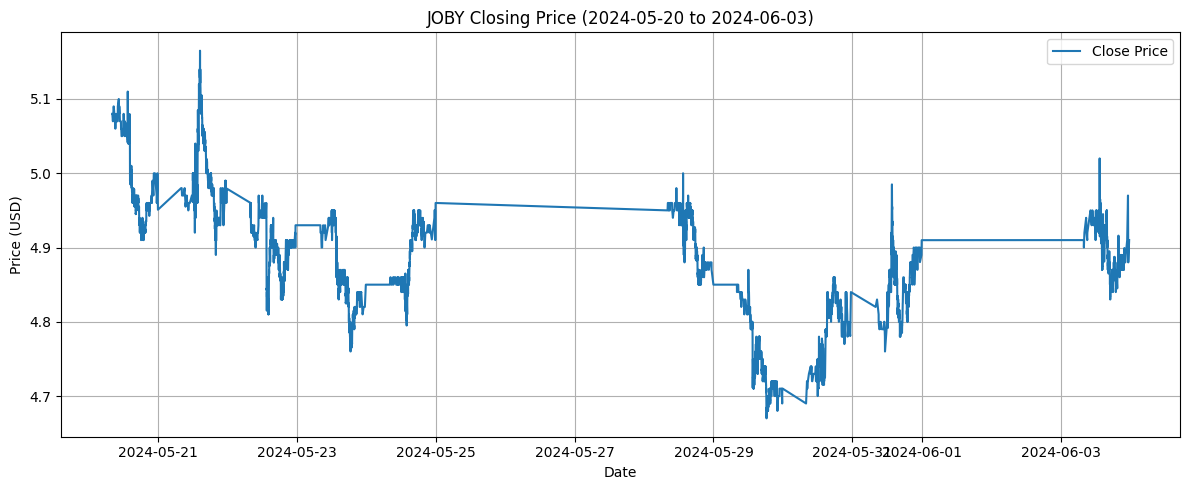

In [9]:
# Plot the closing price
if df is not None:
    plt.figure(figsize=(12, 5))
    plt.plot(df["Date"], df["Close"], label="Close Price")
    # plt.title("Closing Price (2022)")
    plt.title(f"{ticker} Closing Price ({df['Date'].iloc[0].date()} to {df['Date'].iloc[-1].date()})")
    plt.xlabel("Date")
    plt.ylabel("Price (USD)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [10]:
import sys
print(sys.executable)

c:\Users\tony.chen\Documents\AlphaVestra\venv\Scripts\python.exe
